## locations vs no of fundings

#### Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations - Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

Bangalore 11400788108
Mumbai 4939225015
New Delhi 3358571515
Gurgaon 3006496134
Noida 1263164000


C:\Users\acer\AppData\Local\Temp\ipykernel_5720\2332500326.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['City  Location'].replace("Delhi", "New Delhi", inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_5720\2332500326.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

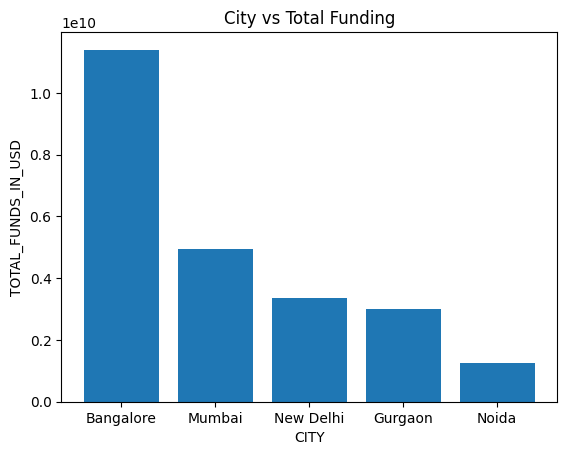

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading file
df = pd.read_csv('startup_funding.csv', encoding='utf-8')
  
# Dropping rows with null values in 'City  Location' column
df.dropna(subset=["City  Location"], inplace=True)

# Function to separate city from location
def separateCity(city):
    return city.split('/')[0].strip()

# Applying the function to the 'City  Location' column
df['City  Location'] = df['City  Location'].apply(separateCity)

# Replacing values for consistency in city names
df['City  Location'].replace("Delhi", "New Delhi", inplace=True)
df['City  Location'].replace("bangalore", "Bangalore", inplace=True)

# Cleaning 'Amount in USD' column by removing spaces and commas
df['Amount in USD'] = df['Amount in USD'].apply(lambda x: str(x).replace(",", "").replace(" ", "") if isinstance(x, str) else x)

# Converting the 'Amount in USD' column to numeric
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')

# Dropping rows where 'Amount in USD' is NaN after conversion
df.dropna(subset=["Amount in USD"], inplace=True)

# Grouping by 'City  Location' and summing 'Amount in USD'
df_grouped = df.groupby('City  Location')['Amount in USD'].sum()

# Sorting the values in descending order
df_grouped = df_grouped.sort_values(ascending=False)

# Filtering for specific cities
df_grouped = df_grouped[df_grouped.index.isin(['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Noida'])]

# Extracting city names and total funds
city = df_grouped.index
totalfunds = df_grouped.values

# Loop to print city names and corresponding total funds
for i in range(len(city)):
    print(city[i], int(totalfunds[i]))

# Plotting the bar graph
plt.bar(city, totalfunds)
plt.ylabel('TOTAL_FUNDS_IN_USD')
plt.xlabel('CITY')
plt.title('City vs Total Funding')
plt.show()



#### Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

Sequoia Capital 72
Accel Partners 68
 58
Kalaari Capital 50
SAIF Partners 47


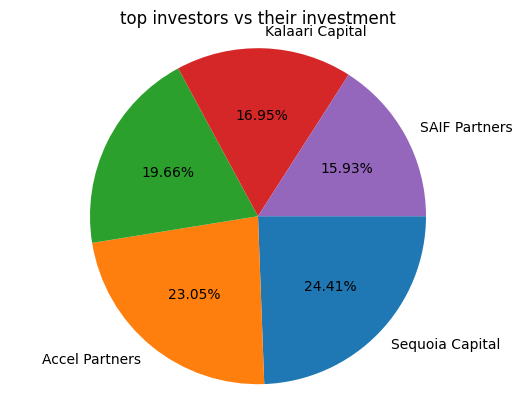

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading file
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')

# Dropping null values

df=df.dropna(subset=['Investors Name'])

df = df[df['Investors Name'] != 'Undisclosed investors']
df = df[df['Investors Name'] != 'Undisclosed investors']
df = df[df['Investors Name'] != 'undisclosed investors']
df = df[df['Investors Name'] != 'undisclosed investor']

# Splitting before ","
investors = df['Investors Name']
investors_name = []
for i in investors:
    if i != "":
        temp = i.split(",")
        for j in temp:
            investors_name.append(j.strip())

# Creating dictionary

dct = {}


for key in investors_name:
    if key in dct:
        dct[key]+=1
    else:
        dct[key]=1

# Sorting keys
dct_keys = sorted(dct,key=dct.get,reverse=True)

c=0
investors_name=[]
count=[]

# Loop
for i in range(len(dct_keys)):
    print(dct_keys[i],dct[dct_keys[i]])
    investors_name.append(dct_keys[i])
    count.append(dct[dct_keys[i]])
    c+=1
    if c==5:
        break

# Plotting graph
plt.pie(count,labels=investors_name,autopct="%0.2f%%",counterclock=False)
plt.axis('equal')
plt.title("top investors vs their investment")
plt.show()
   

#### After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm

Ratan Tata 25
Indian Angel Network 23
Kalaari Capital 16
Sequoia Capital 15
Group of Angel Investors 14


C:\Users\acer\AppData\Local\Temp\ipykernel_3884\1142180903.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Startup Name'].replace('OyoRooms','Oyo',inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_3884\1142180903.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



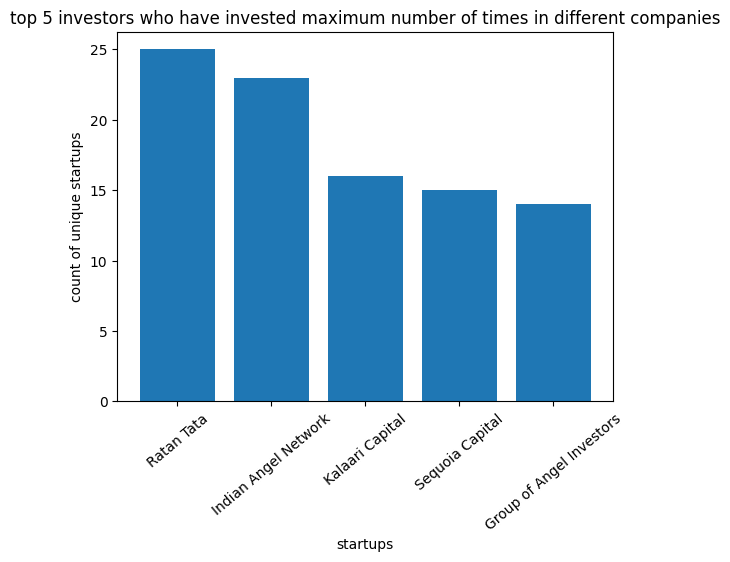

In [24]:
import  csv
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('startup_funding.csv',encoding='utf-8')

# Dropping null values from Investors name ,startup name
df=df.dropna(subset=['Investors Name','Startup Name'])

# oyo renaming
df['Startup Name'].replace('OyoRooms','Oyo',inplace=True)
df['Startup Name'].replace('Oyo Rooms','Oyo',inplace=True)
df['Startup Name'].replace('OYO Rooms','Oyo',inplace=True)
df['Startup Name'].replace('OYOfit','Oyo',inplace=True)

# paytm renaming
df['Startup Name'].replace('Paytm Marketplace','Paytm',inplace=True)
# flipkart renaming
df['Startup Name'].replace('Flipkart.com','Flipkart',inplace=True)

# ola renaming
df['Startup Name'].replace('Ola Cabs','Ola',inplace=True)
df['Startup Name'].replace('Ola Electric','Ola',inplace=True)

df = df[df['Investors Name'] != 'Undisclosed Investors']
df = df[df['Investors Name'] != 'Undisclosed investors']
df = df[df['Investors Name'] != 'undisclosed investors']
df = df[df['Investors Name'] != 'undisclosed investor']

# Splitting values in col 'investors name'
investors=df['Investors Name']
investors_name=[]
for i in investors:
    if i !=" ":
        temp=i.split(',')[0]
        for j in temp:
            investors_name.append(j.strip())

# Splitting values in col 'startup name'
startups=df['Startup Name']
startups_name=[]

for i in startups:
    if i!=" ":
        temp=i.split(',')[0]
        for j in temp:
            startups_name.append(j.strip())

df=df.groupby('Investors Name')['Startup Name'].nunique()
df=df.sort_values(ascending=False)
df=df.head()

startups=[]
count=[]
for i in range(5):
    print(df.index[i],df.values[i])
    startups.append(df.index[i])
    count.append(df.values[i])

# plotting graph
plt.bar(startups,count)
plt.xlabel("startups")
plt.ylabel("count of unique startups")
plt.title("top 5 investors who have invested maximum number of times in different companies")
plt.xticks(rotation=40)
plt.show()

#### Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

C:\Users\acer\AppData\Local\Temp\ipykernel_6188\3009193882.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Startup Name'].replace('Oyorooms','Oyo',inplace = True)
C:\Users\acer\AppData\Local\Temp\ipykernel_6188\3009193882.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Indian Angel Network 33
Rajan Anandan 24
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


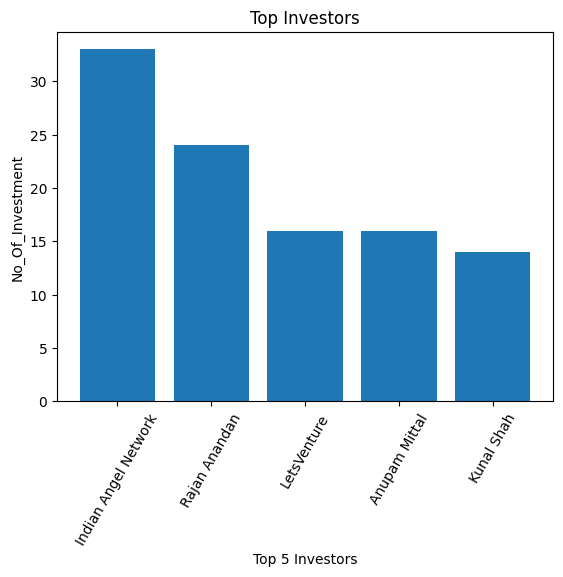

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['Investors Name', 'Startup Name'])

df['Startup Name'].replace('Oyorooms','Oyo',inplace = True)
df['Startup Name'].replace('OyoRooms','Oyo',inplace = True)
df['Startup Name'].replace('Oyo Rooms','Oyo',inplace = True)
df['Startup Name'].replace('OYO Rooms','Oyo',inplace = True)
df['Startup Name'].replace('Olacabs','Ola',inplace = True)
df['Startup Name'].replace('Ola Cabs','Ola',inplace = True)
df['Startup Name'].replace('Olacabs','Ola',inplace = True)
df['Startup Name'].replace('Flipkart.com','Flipkart',inplace = True)
df['Startup Name'].replace('Paytm Marketplace','Paytm',inplace = True)

df = df[df['Investors Name'] != 'Undisclosed Investors']
df = df[df['Investors Name'] != 'Undisclosed investors']
df = df[df['Investors Name'] != 'undisclosed investors']
df = df[df['Investors Name'] != 'undisclosed investor']

df['InvestmentnType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentnType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentnType'].replace('Crowd funding','Crowd Funding',inplace=True)

df =df[ (df['InvestmentnType']== 'Crowd Funding') | (df['InvestmentnType'] == 'Seed Funding')]

investor_name = []
startup_name = []

for index,row in df.iterrows():
    s = row['Investors Name']
    v = row['Startup Name']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

df1 = pd.DataFrame({'Investors Name' : investor_name,'Startup Name' : startup_name})
df1 = df1.groupby('Investors Name')['Startup Name'].nunique()
df1 = df1.sort_values(ascending = False)
df1 = df1.head(5)
name = []
count = []
for i in range(5):
    print(df1.index[i],df1.values[i])
    name.append(df1.index[i])
    count.append(df1.values[i])
    
plt.bar(name,count)
plt.xticks(rotation=60)
plt.xlabel('Top 5 Investors')
plt.ylabel('No_Of_Investment')
plt.title('Top Investors')
plt.show()

#### Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Accel Partners 53
Sequoia Capital 49
Kalaari Capital 39
Blume Ventures 31
SAIF Partners 26


C:\Users\acer\AppData\Local\Temp\ipykernel_6188\3588810351.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Startup Name'].replace('Oyorooms','Oyo',inplace = True)
C:\Users\acer\AppData\Local\Temp\ipykernel_6188\3588810351.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


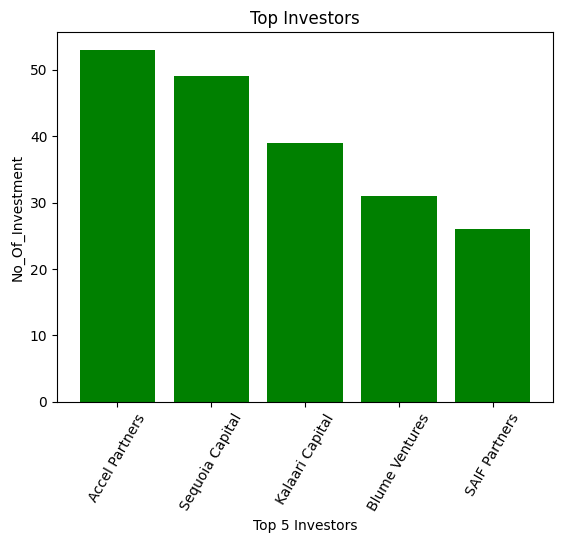

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['Investors Name', 'Startup Name'])

df['Startup Name'].replace('Oyorooms','Oyo',inplace = True)
df['Startup Name'].replace('OyoRooms','Oyo',inplace = True)
df['Startup Name'].replace('Oyo Rooms','Oyo',inplace = True)
df['Startup Name'].replace('OYO Rooms','Oyo',inplace = True)
df['Startup Name'].replace('Olacabs','Ola',inplace = True)
df['Startup Name'].replace('Ola Cabs','Ola',inplace = True)
df['Startup Name'].replace('Olacabs','Ola',inplace = True)
df['Startup Name'].replace('Flipkart.com','Flipkart',inplace = True)
df['Startup Name'].replace('Paytm Marketplace','Paytm',inplace = True)

df = df[df['Investors Name'] != 'Undisclosed Investors']
df = df[df['Investors Name'] != 'Undisclosed investors']
df = df[df['Investors Name'] != 'undisclosed investors']
df = df[df['Investors Name'] != 'undisclosed investor']

df['InvestmentnType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentnType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentnType'].replace('Crowd funding','Crowd Funding',inplace=True)

df = df[df.InvestmentnType == 'Private Equity']

investor_name = []
startup_name = []

for index,row in df.iterrows():
    s = row['Investors Name']
    v = row['Startup Name']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

df1 = pd.DataFrame({'Investors Name' : investor_name,'Startup Name' : startup_name})
df1 = df1.groupby('Investors Name')['Startup Name'].nunique()
df1 = df1.sort_values(ascending = False)
df1 = df1.head(5)
name = []
count = []
for i in range(5):
    print(df1.index[i],df1.values[i])
    name.append(df1.index[i])
    count.append(df1.values[i])
    
plt.bar(name,count,color='green')
plt.xticks(rotation=60)
plt.xlabel('Top 5 Investors')
plt.ylabel('No_Of_Investment')
plt.title('Top Investors')
plt.show()